In [1]:
import ktrain
from ktrain import text

/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

using Keras version: 2.2.4


In [2]:
# load data

categories = ['alt.atheism', 'soc.religion.christian',
             'comp.graphics', 'sci.med']

from sklearn.datasets import fetch_20newsgroups

train_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
test_data = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

print('size of training set: %s' % (len(train_data['data'])))
print('size of validation set: %s' % (len(test_data['data'])))
print('classes: %s' % (train_data.target_names))

x_train = train_data.data
y_train = train_data.target
x_test = test_data.data
y_test = test_data.target

size of training set: 2257
size of validation set: 1502
classes: ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']


In [3]:
# get bert pretrained model

(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                                                       x_test=x_test, y_test=y_test,
                                                                       class_names=train_data.target_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=350, 
                                                                       max_features=35000)

preprocessing train...
language: en


preprocessing test...
language: en


In [4]:
# build classifier model

model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train), batch_size=6)

Is Multi-Label? False
maxlen is 350
done.


simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
2257/2257 [==============================] - 4962s 2s/step - loss: 1.2973 - acc: 0.4023
Epoch 2/1024
  78/2257 [>.............................] - ETA: 1:33:27 - loss: 0.6219 - acc: 0.8590

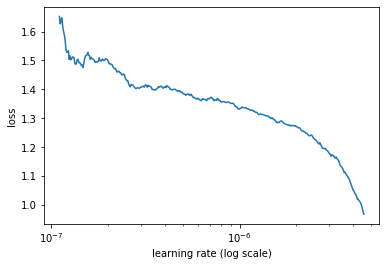

In [5]:
# find good learning rate
learner.lr_find()             # briefly simulate training to find good learning rate
learner.lr_plot()             # visually identify best learning rate

In [7]:
learner.fit_onecycle(2e-5, 2)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/2
2257/2257 [==============================] - 5005s 2s/step - loss: 0.5166 - acc: 0.8015
Epoch 2/2
2257/2257 [==============================] - 5466s 2s/step - loss: 0.0925 - acc: 0.9725


In [9]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [10]:
learner.validate(val_data=(x_test, y_test), class_names=train_data.target_names)

                        precision    recall  f1-score   support

           alt.atheism       0.90      0.90      0.90       319
         comp.graphics       0.99      0.93      0.96       389
               sci.med       0.93      0.96      0.95       396
soc.religion.christian       0.94      0.96      0.95       398

             micro avg       0.94      0.94      0.94      1502
             macro avg       0.94      0.94      0.94      1502
          weighted avg       0.94      0.94      0.94      1502



array([[287,   1,  11,  20],
       [ 14, 361,  12,   2],
       [  7,   3, 382,   4],
       [ 12,   1,   4, 381]])